# CMP223 Data Analysis

TODO escrever aqui as coisas bonitas

This notebook yada yada etc

The .csv file with the energy measurements etc
This file is generated with the `./snmp_energy_monitor.sh` script making snmp requests to the PDU suplying energy to the partition--the poti partition in the PDU 123, in this case. The format is "date,Energy,ActivePower":

	date: YYYY-MM-DD hh:mm:ss
	Energy: cumulative value. integer, Wh
	Active Power: the usable or consumed electrical energy in an AC circuit. integer, W

## Idle experiment

In this experiment, we allocated the complete poti partition for a period of time and did nothing :) These measurements ran for a few hours, in two differents days. Let's take a look at them:

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
# precisei desailitar uns warning aqui por causa da iteração na lista de dataframes :')
pd.options.mode.chained_assignment = None  # default='warn'

#idle_1 = pd.read_csv('./data/idle_poti/energy_monitor_123_2025-09-10.csv', usecols=['Time', 'Energy', 'Active_Power'])
idle = pd.read_csv('./data/idle_poti/energy_monitor_123_2025-09-15.csv', usecols=['Time', 'Energy', 'Active_Power'])

# Convering the 'Time' column to datetime format, and adding a fourth column with the elapsed time since the beggining of the measurements
idle['Time'] = pd.to_datetime(idle['Time'], format='%Y-%m-%d %H:%M:%S')
idle['Elapsed'] = idle['Time'].sub(idle['Time'].iloc[0])
idle['Elapsed'] = idle['Elapsed'].dt.seconds

idle.describe()

,Time,Energy,Active_Power,Elapsed
count,520340,5.203390e+05,520339.000000,520340.000000
mean,2025-09-15 23:54:28.047257344,6.675268e+06,311.938882,39602.673771
min,2025-09-15 10:38:46,6.670945e+06,310.000000,0.000000
25%,2025-09-15 17:17:27,6.673108e+06,311.000000,14933.000000
50%,2025-09-15 23:53:57,6.675264e+06,312.000000,38754.000000
75%,2025-09-16 06:31:58,6.677429e+06,312.000000,62648.000000
max,2025-09-16 13:08:41,6.679587e+06,424.000000,86399.000000
std,NaN,2.493677e+03,1.626593,26313.167636


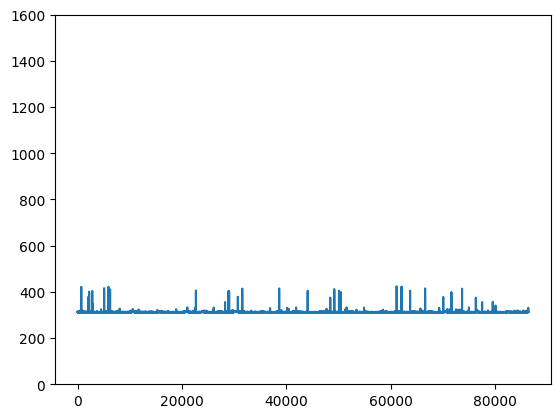

In [39]:
# First we vizualise the data

#idle.plot(x="Elapsed", y="Active_Power")

fig, ax = plt.subplots()
ax.plot(idle['Elapsed'], idle['Active_Power'])
ax.set_ylim(0,1600) #plots must begin at zero!!!, 1600 is just so we can have the same scale as the stress experiment
plt.show()

TODO de repente cortar em slices, fazer uns subplots com intervalos menores pra mostrar que a baseline não varia


## Stress experiment

TODO completar aqui dps

Explanation about the stress experiment and the stress package we're using

The data of about the experiment etc etc

    time: total runtime of the experiment
    factors:
        cpu:
        io:
        memory:
        nodes:
    exp:
    order:
    start_ts:
    end_ts:



In [55]:
experiment = pd.read_csv("./data/stress_poti_5_nodes_735647/stress_poti_5_nodes_735647_output.csv", usecols=["time","cpu","io","memory","nodes","exp","order","start_ts","end_ts"])
#experiment = experiment.set_index('nodes')  # make sure indexes pair with number of nodes

experiment["start_ts"] = pd.to_datetime(experiment["start_ts"], format="%Y-%m-%d %H:%M:%S")
experiment["end_ts"] = pd.to_datetime(experiment["end_ts"], format="%Y-%m-%d %H:%M:%S")

experiment = experiment.sort_values(['nodes','cpu','memory','io']) # ordenar por numero de nodos, cpu, memoria, io
experiment.head()

,time,cpu,io,memory,nodes,exp,order,start_ts,end_ts
11,5m,0,24,0,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU0_IO24_MEM0_N1_12,2025-11-25 18:16:04,2025-11-25 18:21:04
12,5m,0,12,12,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU0_IO12_MEM12_N1_13,2025-11-25 18:21:34,2025-11-25 18:26:34
8,5m,0,0,24,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU0_IO0_MEM24_N1_9,2025-11-25 17:59:34,2025-11-25 18:04:34
4,5m,8,8,8,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU8_IO8_MEM8_N1_5,2025-11-25 17:37:34,2025-11-25 17:42:34
16,5m,12,12,0,1,stress_poti_5_nodes,stress_poti_5_nodes_5m_CPU12_IO12_MEM0_N1_17,2025-11-25 18:43:34,2025-11-25 18:48:34


Now we get the energy measurements from the other file

In [59]:
stress = pd.read_csv("./data/stress_poti_5_nodes_735647/energy_monitor_123_stress_5_nodes.csv", usecols=["Time", "Energy", "Active_Power"])
stress = stress.reset_index()  # make sure indexes pair with number of rows

stress["Time"] = pd.to_datetime(stress["Time"], format="%Y-%m-%d %H:%M:%S")
#stress["Elapsed"] = stress["Time"].sub(stress["Time"].iloc[0])
#stress["Elapsed"] = stress["Elapsed"].dt.seconds
#stress["Accumulated"] = stress["Energy"].diff()

stress.head()

,index,Time,Energy,Active_Power
0,0,2025-11-25 17:10:00,7415248,436
1,1,2025-11-25 17:10:00,7415248,436
2,2,2025-11-25 17:10:00,7415248,436
3,3,2025-11-25 17:10:00,7415248,436
4,4,2025-11-25 17:10:00,7415248,436


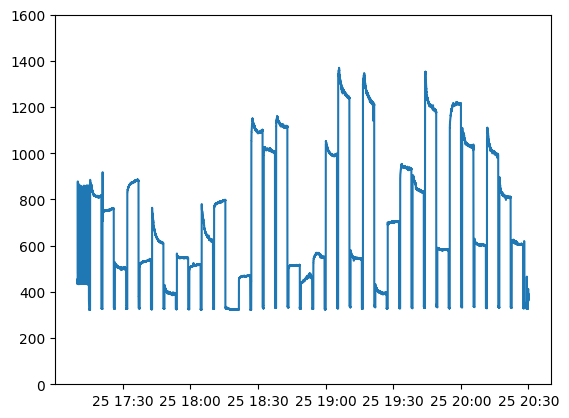

In [41]:
# vizualize it first
#stress.plot(x="Time", y="Active_Power")

fig, ax = plt.subplots()
ax.plot(stress['Time'], stress['Active_Power'])
ax.set_ylim(0,1600) #plots must begin at zero!!!, 1400 is just so we can have the same scale as the stress experiment
plt.show()

Utter joy (alegria total)

Now we need to slice the csv with the results so we can separate each experiment. Note: the `iterrows` function [is very slow](https://pandas.pydata.org/docs/user_guide/basics.html#iteration) and we only use it because we have a small list of experiments. For bigger lists we should use [something else](https://stackoverflow.com/questions/16476924/how-can-i-iterate-over-rows-in-a-pandas-dataframe/77270285#77270285).

TODO colocar as informações sobre o experimento diretamente no dataframe stress, do tipo
```
Time,Energy,Active_Power,nodes,cpu,memory,io
2025-11-25 17:10:00, 7415248, 436, 1, 0, 0, 24
2025-11-25 17:10:01, 7415248, 436, 1, 0, 0, 24
2025-11-25 17:10:01, 7415248, 436, 1, 0, 0, 24
....
```

In [72]:
stress['Nodes'] = 0

for index, row in experiment.iterrows():
    start_time = row['start_ts']
    end_time = row['end_ts']
    nodes = row['nodes']
    cpu = row['cpu']
    memory = row['memory']
    io = row['io']

    # works
    #print(stress.loc[(stress['Time']>start_time) & (stress['Time']<=end_time), 'index'])

    # don't work
    #interval = pd.Interval(left=start_time, right=end_time)
    #stress.loc[stress['Time'] in interval, 'Nodes'] = nodes

    # don't work
    stress.loc[((stress['Time']>start_time) & (stress['Time']<=end_time)), 'Nodes'] = nodes

stress


,index,Time,Energy,Active_Power,Nodes
0,0,2025-11-25 17:10:00,7415248,436,0
1,1,2025-11-25 17:10:00,7415248,436,0
2,2,2025-11-25 17:10:00,7415248,436,0
3,3,2025-11-25 17:10:00,7415248,436,0
4,4,2025-11-25 17:10:00,7415248,436,0
...,...,...,...,...,...
65380,65380,2025-11-25 20:29:59,7417739,378,0
65381,65381,2025-11-25 20:29:59,7417739,378,0
65382,65382,2025-11-25 20:29:59,7417739,378,0
65383,65383,2025-11-25 20:29:59,7417739,369,0


In [77]:
# versão anterior em que eu crio uma lista de dataframes (mais dificil de fazer os plots)

results = list()

for index, row in experiment.iterrows():
    # print(row['start_ts'], row['end_ts'])
    start_time = row['start_ts']
    end_time = row['end_ts']
    
    # df[[df['Time'] >= start_time] and [df['Time'] <= end_time)]
    results.append(stress.loc[(stress['Time']>=start_time) & (stress['Time']<=end_time)])


TODO plotar a lista de dataframes (results)

In [78]:
#iterar os dataframes e adicionar uma coluna com o tempo decorrido desde o inicio daquele experimento

for index, result in enumerate(results):
    results[index]['Elapsed'] = results[index]['Time'].sub(results[index]['Time'].iloc[0])
    results[index]['Elapsed'] = results[index]['Elapsed'].dt.seconds

#deu alguns warnings bizarros aqui pq a indexação ficou confusa e aí eu setei pra desabilitar

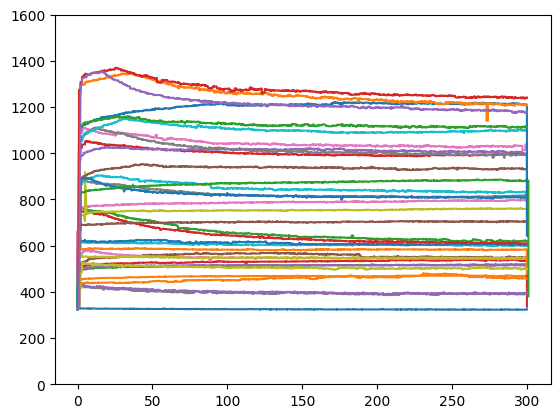

In [79]:
fig = plt.figure()

ax = fig.add_subplot(111)

#for i in range(7):
#   ax.plot(results[i]['Elapsed'], results[i]['Active_Power'])

for index, result in enumerate(results):
    ax.plot(results[index]['Elapsed'], results[index]['Active_Power'])

ax.set_ylim(0,1600) #plots must begin at zero!!!, 1600 is just so we can have the same scale as the stress experiment
plt.show()